# Stock Market Analysis by Sector 

### Brief Information :
    The project mainly analyzes the performance of various industry sectors to support sustainable investment decisions. 
    we use Exploratory Data Analysis (EDA) to visualize and summarize stock market data to uncover patterns, 
    trends, and correlations. Key analyses include sector performance during COVID-19, risk-adjusted returns, and correlation behaviors between sectors. The project aim to answer the author curiosity in 
    identifying promising and stable sectors for long-term sustainable investing. (and also for data science class :) )

### Tools & Techniques :
    Python (pandas, matplotlib, seaborn)



### EDA Techniques :  
    - Summary statistics (mean, median, std dev)  
    - Time series plotting  
    - Sector-wise distribution analysis  
    - Correlation heatmaps  
    - Outlier detection using box plots  
    - Trend analysis  


### Objectives :
    - Analyze correlations between industry sectors’ stock returns
    - Evaluate sector performance during key COVID-19 periods
    - Assess sectors’ risk-adjusted returns over 5 years

### Research Questions :
    1) Which industry sectors exhibit the strongest correlations in their stock price returns?
    2) How did different sectors perform during key COVID-19 periods (pre-pandemic, pandemic onset, and recovery)?
    3) Which industry sectors offer the best risk-adjusted returns over 5 years
  




### Inferential Methods by Research Question

| #  | Research Question                                                                                           | Test                 | Reason                                                                                  |
| -- | ----------------------------------------------------------------------------------------------------------- | -------------------- | -------------------------------------------------------------------------------------------- |
| Q1 | Which industry sectors exhibit the strongest correlations in their stock price returns?                     | Spearman correlation | Assess strength and direction of monotonic relationships between sector return pairs         |
| Q2 | How did different sectors perform during key COVID-19 periods (pre-pandemic, pandemic onset, and recovery)? | Kruskal-Wallis test  | Compare sector returns across different COVID-19 periods (non-parametric test for 3+ groups) |
| Q3 | Which industry sectors offer the best risk-adjusted returns over 5 years                                    | Kruskal-Wallis test  | Compare Sharpe ratios across sectors to identify differences in risk-adjusted performance    |


### Dataset : 
https://github.com/datasets/s-and-p-500-companies <br>
https://www.kaggle.com/datasets/iveeaten3223times/massive-yahoo-finance-dataset/dataLinks

In [1]:
# import packages
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
import numpy as np


In [2]:
# import first dataset
df_5_yrs = pd.read_csv("stock_details_5_years.csv")
df_5_yrs

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA
...,...,...,...,...,...,...,...,...,...
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ


In [3]:
#1 import additional sectors and industries data
url = "https://raw.githubusercontent.com/datasets/s-and-p-500-companies/master/data/constituents.csv"
df_sec_ind = pd.read_csv(url)
df_sec_ind

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [4]:
#2 merging data set and changing the column header for better understanding 
df_sec_ind_renamed = df_sec_ind.rename(columns={
    'Symbol': 'Company',
    'GICS Sector': 'Sector',
    'GICS Sub-Industry': 'Industry'
})

merged_df = df_5_yrs.merge(df_sec_ind_renamed[['Company', 'Sector', 'Industry']], on='Company', how='left')
merged_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Sector,Industry
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL,Information Technology,"Technology Hardware, Storage & Peripherals"
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT,Information Technology,Systems Software
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL,Communication Services,Interactive Media & Services
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN,Consumer Discretionary,Broadline Retail
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA,Information Technology,Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...
602957,2023-11-29 00:00:00-05:00,26.360001,26.397499,26.120001,26.150000,1729147,0.00,0.0,PPL,Utilities,Electric Utilities
602958,2023-11-29 00:00:00-05:00,27.680000,28.535000,27.680000,28.350000,1940066,0.00,0.0,FITB,Financials,Regional Banks
602959,2023-11-29 00:00:00-05:00,75.940002,76.555000,75.257500,75.610001,298699,0.00,0.0,IFF,Materials,Specialty Chemicals
602960,2023-11-29 00:00:00-05:00,45.230000,45.259998,44.040001,44.209999,2217579,0.00,0.0,CCJ,NaN,NaN


In [5]:
# test some values
merged_df[merged_df['Company'] == 'NVDA']
# result : as we wanted, Sector and Industry columns are filled with value. 

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Sector,Industry
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA,Information Technology,Semiconductors
462,2018-11-30 00:00:00-05:00,39.134605,40.650374,38.631003,40.543697,72956400,0.00,0.0,NVDA,Information Technology,Semiconductors
920,2018-12-03 00:00:00-05:00,42.818602,43.334604,41.513699,42.183514,89080400,0.00,0.0,NVDA,Information Technology,Semiconductors
1378,2018-12-04 00:00:00-05:00,41.736964,41.786580,38.824505,38.975834,81211200,0.00,0.0,NVDA,Information Technology,Semiconductors
1836,2018-12-06 00:00:00-05:00,37.569232,39.318197,37.412940,39.268578,69230800,0.00,0.0,NVDA,Information Technology,Semiconductors
...,...,...,...,...,...,...,...,...,...,...,...
600511,2023-11-22 00:00:00-05:00,498.519989,503.350006,476.899994,487.160004,89942000,0.00,0.0,NVDA,Information Technology,Semiconductors
601002,2023-11-24 00:00:00-05:00,484.700012,489.209991,477.450012,477.760010,29464500,0.00,0.0,NVDA,Information Technology,Semiconductors
601493,2023-11-27 00:00:00-05:00,478.000000,485.299988,476.519989,482.420013,39566200,0.00,0.0,NVDA,Information Technology,Semiconductors
601984,2023-11-28 00:00:00-05:00,482.359985,483.230011,474.730011,478.209991,40089000,0.00,0.0,NVDA,Information Technology,Semiconductors


### Data Observation

In [6]:
# 1
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
 9   Sector        413881 non-null  object 
 10  Industry      413881 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 50.6+ MB


In [7]:
merged_df[merged_df['Stock Splits'] != 0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Sector,Industry
3661,2018-12-11 00:00:00-05:00,24.464137,24.464137,23.767314,23.999590,1495050,0.000,1.500,ROL,Industrials,Environmental & Facilities Services
8909,2018-12-28 00:00:00-05:00,22.098485,22.338686,21.507592,21.824656,8881065,0.000,1.806,DELL,Information Technology,"Technology Hardware, Storage & Peripherals"
21394,2019-02-07 00:00:00-05:00,64.349998,64.889999,63.040001,63.910000,2904700,0.000,2.000,CNC,Health Care,Managed Health Care
26708,2019-02-26 00:00:00-05:00,66.123135,66.797230,64.529804,65.326469,16651495,0.000,1.040,GE,Industrials,Aerospace & Defense
37982,2019-04-01 00:00:00-04:00,7.509056,7.621611,7.428659,7.444739,16624300,0.000,1.200,BBD,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
548691,2023-06-23 00:00:00-04:00,130.053322,133.120520,129.219508,132.614288,356400,4.845,0.963,TRI,NaN,NaN
568830,2023-08-22 00:00:00-04:00,43.330002,44.090000,43.230000,43.790001,3608500,0.000,2.000,CPRT,Industrials,Diversified Support Services
568838,2023-08-22 00:00:00-04:00,70.648486,70.936079,69.924551,70.707993,2517000,0.000,2.000,SRE,Utilities,Multi-Utilities
578424,2023-09-20 00:00:00-04:00,94.699997,96.419998,93.540001,94.730003,6124500,0.000,2.000,NVO,NaN,NaN


In [8]:
merged_df[merged_df['Dividends'] != 0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Sector,Industry
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.0400,0.0,NVDA,Information Technology,Semiconductors
27,2018-11-29 00:00:00-05:00,42.493415,42.622759,42.226108,42.234730,11564300,0.3900,0.0,KO,Consumer Staples,Soft Drinks & Non-alcoholic Beverages
69,2018-11-29 00:00:00-05:00,135.975210,136.696170,134.947826,135.614716,2970200,0.8000,0.0,UNP,Industrials,Rail Transportation
81,2018-11-29 00:00:00-05:00,39.549692,39.647964,39.056101,39.558624,6867200,0.2775,0.0,NEE,Utilities,Multi-Utilities
93,2018-11-29 00:00:00-05:00,175.483302,176.763477,172.922939,174.435883,2665700,0.8000,0.0,GS,Financials,Investment Banking & Brokerage
...,...,...,...,...,...,...,...,...,...,...,...
601560,2023-11-27 00:00:00-05:00,412.410004,414.010010,410.390015,412.250000,1326900,0.9000,0.0,SPGI,Financials,Financial Exchanges & Data
601807,2023-11-27 00:00:00-05:00,127.550003,128.410004,127.220001,127.690002,1143800,0.6050,0.0,YUM,Consumer Discretionary,Restaurants
601930,2023-11-27 00:00:00-05:00,47.799999,47.910000,47.090000,47.630001,1399800,0.1500,0.0,WPM,NaN,NaN
602280,2023-11-28 00:00:00-05:00,136.729996,137.289993,136.250000,136.380005,1404000,0.1900,0.0,EA,Communication Services,Interactive Home Entertainment


In [9]:
# check s&p500 companies information
print(merged_df['Company'].nunique())  
# result : understanding because some companies might have multiple share classes (?)

491


In [10]:
# count unique Industry and Sector
num_unique_industries = merged_df['Industry'].nunique()
print(f"industries :  {num_unique_industries}")

num_unique_sectors = merged_df['Sector'].nunique()
print(f"sectors : {num_unique_sectors}")

industries :  110
sectors : 11


In [11]:
# count how many companies in each sector 
company_in_sec = merged_df.groupby('Sector')['Company'].nunique()
print(company_in_sec)
print(company_in_sec.sum())

Sector
Communication Services    14
Consumer Discretionary    31
Consumer Staples          24
Energy                    17
Financials                51
Health Care               43
Industrials               52
Information Technology    48
Materials                 15
Real Estate               18
Utilities                 21
Name: Company, dtype: int64
334


In [12]:
nan_rows = merged_df[merged_df[['Company', 'Sector', 'Industry']].isna().any(axis=1)]
print(nan_rows)

                             Date        Open        High         Low  \
9       2018-11-29 00:00:00-05:00   33.520714   33.891693   33.450050   
12      2018-11-29 00:00:00-05:00   19.554069   19.699040   19.460263   
22      2018-11-29 00:00:00-05:00  163.608448  164.291218  162.119641   
25      2018-11-29 00:00:00-05:00  121.519997  122.320000  121.379997   
31      2018-11-29 00:00:00-05:00   77.506613   79.218716   75.676750   
...                           ...         ...         ...         ...   
602947  2023-11-29 00:00:00-05:00   33.720001   33.790001   33.544998   
602948  2023-11-29 00:00:00-05:00    3.555000    3.580000    3.550000   
602951  2023-11-29 00:00:00-05:00   40.590000   40.610001   39.939999   
602952  2023-11-29 00:00:00-05:00   15.850000   16.010000   15.690900   
602960  2023-11-29 00:00:00-05:00   45.230000   45.259998   44.040001   

             Close   Volume  Dividends  Stock Splits Company Sector Industry  
9        33.503048  7056600        0.0      

In [13]:
nan_rows['Company'].nunique()

157

In [14]:
157+334

491

In [15]:
nan_rows['Company'].dropna().unique()

array(['TSM', 'NVO', 'ASML', 'TM', 'FMX', 'SHEL', 'NVS', 'AZN', 'BABA',
       'PDD', 'SAP', 'TTE', 'BHP', 'HDB', 'HSBC', 'BUD', 'RY', 'UL',
       'SNY', 'RIO', 'TD', 'SONY', 'MUFG', 'BP', 'PBR', 'SHOP', 'EQNR',
       'UBS', 'MELI', 'IBN', 'DEO', 'CNI', 'ENB', 'NTES', 'INFY', 'RELX',
       'GSK', 'CNQ', 'BTI', 'RACE', 'STLA', 'CP', 'SAN', 'SMFG', 'VALE',
       'TRI', 'ITUB', 'BN', 'BMO', 'EPD', 'BBVA', 'SCCO', 'PXD', 'E',
       'BNS', 'TEAM', 'HMC', 'MRVL', 'NGG', 'ING', 'BSBR', 'ET', 'HES',
       'CRH', 'TAK', 'MFG', 'ABEV', 'LNG', 'JD', 'STM', 'SU', 'BIDU',
       'SGEN', 'SQ', 'WDS', 'TRP', 'MPLX', 'CM', 'BCE', 'BBD', 'SPOT',
       'MFC', 'LYG', 'FERG', 'WCN', 'ARES', 'CVE', 'ORAN', 'IMO', 'IBKR',
       'QSR', 'GOLD', 'PUK', 'ZS', 'MDB', 'CHT', 'SLF', 'CQP', 'PKX',
       'ELP', 'VEEV', 'NTR', 'CCEP', 'BCS', 'RYAAY', 'AEM', 'EC', 'ARGX',
       'ANSS', 'TU', 'SPLK', 'WIT', 'DB', 'HUBS', 'VOD', 'TEF', 'TLK',
       'NWG', 'GIB', 'DFS', 'TCOM', 'RCI', 'WPM', 'FNV', 'ICLR', 'SE

In [16]:
company_sector_map = {
    'TSM': 'Information Technology',
    'NVO': 'Health Care',
    'ASML': 'Information Technology',
    'TM': 'Consumer Discretionary',
    'FMX': 'Consumer Staples',
    'SHEL': 'Energy',
    'NVS': 'Health Care',
    'AZN': 'Health Care',
    'BABA': 'Consumer Discretionary',
    'PDD': 'Consumer Discretionary',
    'SAP': 'Information Technology',
    'TTE': 'Energy',
    'BHP': 'Materials',
    'HDB': 'Financials',
    'HSBC': 'Financials',
    'BUD': 'Consumer Staples',
    'RY': 'Financials',
    'UL': 'Consumer Staples',
    'SNY': 'Health Care',
    'RIO': 'Materials',
    'TD': 'Financials',
    'SONY': 'Consumer Discretionary',
    'MUFG': 'Financials',
    'BP': 'Energy',
    'PBR': 'Energy',
    'SHOP': 'Information Technology',
    'EQNR': 'Energy',
    'UBS': 'Financials',
    'MELI': 'Consumer Discretionary',
    'IBN': 'Financials',
    'DEO': 'Consumer Staples',
    'CNI': 'Industrials',
    'ENB': 'Energy',
    'NTES': 'Communication Services',
    'INFY': 'Information Technology',
    'RELX': 'Industrials',
    'GSK': 'Health Care',
    'CNQ': 'Energy',
    'BTI': 'Consumer Staples',
    'RACE': 'Consumer Discretionary',
    'STLA': 'Consumer Discretionary',
    'CP': 'Industrials',
    'SAN': 'Financials',
    'SMFG': 'Financials',
    'VALE': 'Materials',
    'TRI': 'Industrials',
    'ITUB': 'Financials',
    'BN': 'Financials',
    'BMO': 'Financials',
    'EPD': 'Energy',
    'BBVA': 'Financials',
    'SCCO': 'Materials',
    'PXD': 'Energy',
    'E': 'Energy',
    'BNS': 'Financials',
    'TEAM': 'Information Technology',
    'HMC': 'Consumer Discretionary',
    'MRVL': 'Information Technology',
    'NGG': 'Utilities',
    'ING': 'Financials',
    'BSBR': 'Financials',
    'ET': 'Energy',
    'CRH': 'Materials',
    'TAK': 'Health Care',
    'MFG': 'Financials',
    'ABEV': 'Consumer Staples',
    'LNG': 'Energy',
    'JD': 'Consumer Discretionary',
    'STM': 'Information Technology',
    'SU': 'Energy',
    'BIDU': 'Communication Services',
    'SGEN': 'Health Care',
    'SQ': 'Information Technology',
    'WDS': 'Energy',
    'TRP': 'Energy',
    'MPLX': 'Energy',
    'CM': 'Financials',
    'BCE': 'Communication Services',
    'BBD': 'Industrials',
    'SPOT': 'Communication Services',
    'MFC': 'Financials',
    'LYG': 'Financials',
    'TTD': 'Information Technology',
    'FERG': 'Industrials',
    'WCN': 'Industrials',
    'ARES': 'Financials',
    'CVE': 'Energy',
    'ORAN': 'Communication Services',
    'IMO': 'Energy',
    'IBKR': 'Financials',
    'QSR': 'Consumer Discretionary',
    'GOLD': 'Materials',
    'PUK': 'Financials',
    'ZS': 'Information Technology',
    'MDB': 'Information Technology',
    'CHT': 'Communication Services',
    'SLF': 'Financials',
    'CQP': 'Energy',
    'PKX': 'Materials',
    'ELP': 'Utilities',
    'VEEV': 'Health Care',
    'NTR': 'Materials',
    'CCEP': 'Consumer Staples',
    'BCS': 'Financials',
    'RYAAY': 'Industrials',
    'AEM': 'Materials',
    'EC': 'Energy',
    'ARGX': 'Health Care',
    'TU': 'Communication Services',
    'SPLK': 'Information Technology',
    'WIT': 'Information Technology',
    'DB': 'Financials',
    'HUBS': 'Information Technology',
    'VOD': 'Communication Services',
    'TEF': 'Communication Services',
    'TLK': 'Communication Services',
    'NWG': 'Financials',
    'GIB': 'Information Technology',
    'DFS': 'Financials',
    'TCOM': 'Consumer Discretionary',
    'RCI': 'Communication Services',
    'WPM': 'Materials',
    'FNV': 'Materials',
    'ICLR': 'Health Care',
    'SE': 'Consumer Discretionary',
    'SNAP': 'Communication Services',
    'IX': 'Financials',
    'FCNCA': 'Financials',
    'MT': 'Materials',
    'HEI': 'Industrials',
    'GMAB': 'Health Care',
    'ALNY': 'Health Care',
    'BGNE': 'Health Care',
    'UMC': 'Information Technology',
    'TS': 'Energy',
    'NOK': 'Information Technology',
    'FTS': 'Utilities',
    'CCJ': 'Materials',
    'PDX': 'Health Care',
    'TW': 'Information Technology',
    'ALC': 'Health Care',
    'PINS': 'Communication Services',
    'ZM': 'Information Technology',
    'NET': 'Information Technology',
    'DDOG': 'Information Technology',
    'BNTX': 'Health Care',
    'LI': 'Consumer Discretionary',
    'BEKE': 'Real Estate',
    'SNOW': 'Information Technology',
    'SYM': 'Information Technology',
    'RBLX': 'Communication Services',
    'CPNG': 'Consumer Discretionary',
    'GFS': 'Information Technology',
    'NU': 'Financials',
    'HLN': 'Health Care',
    'MBLY': 'Information Technology',
    'ARM': 'Information Technology',
    'HES': 'Energy',
    'ANSS':'Information Technology'
}


In [17]:
merged_df['Sector'] = merged_df['Sector'].fillna(merged_df['Company'].map(company_sector_map))

In [18]:
merged_df[merged_df[['Company', 'Sector']].isna().any(axis=1)].nunique()

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Company         0
Sector          0
Industry        0
dtype: int64

In [19]:
# count how many companies in each sector after dealing with NaN value 
company_in_sec_after = merged_df.groupby('Sector')['Company']
print(company_in_sec_after)
print(company_in_sec_after.sum())
# result : graceful

Sector
Communication Services    GOOGLMETANFLXTMUSDISCMCSAVZTNTESCHTRBIDUEABCES...
Consumer Discretionary    AMZNTSLAHDTMMCDBABAPDDNKELOWSBUXBKNGSONYTJXMEL...
Consumer Staples          WMTPGCOSTKOPEPFMXPMBUDULMDLZDEOMOBTICLTGTELKDP...
Energy                    XOMCVXSHELTTECOPBPPBREQNRSLBENBEOGCNQEPDPXDPSX...
Financials                VJPMMABACWFCHDBHSBCBXSPGIMSAXPRYTDBLKGSSCHWMUF...
Health Care               LLYUNHNVOJNJMRKABBVNVSAZNTMOABTPFEDHRAMGNSNYSY...
Industrials               BAUNPUPSGEHONCATRTXLMTDEADPETNCNIITWRELXNOCWMG...
Information Technology    AAPLMSFTNVDATSMAVGOORCLADBEASMLCRMACNAMDCSCOIN...
Materials                 LINBHPRIOSHWVALEAPDSCCOECLFCXNEMCRHNUEPPGDDLYB...
Real Estate               PLDAMTEQIXCCIWELLSPGPSADLROCSGPVICIEXRSBACAVBC...
Utilities                 NEESODUKNGGSREPCGAEPDEXCXELPEGEDELPWECAWKEIXDT...
Name: Company, dtype: object


In [20]:
# drop duplicates so we have the unique value to count on 
unique_company_industries = merged_df[['Company', 'Industry']].drop_duplicates()

# count total companies that belongs to industries
# sub-category of Sector
industry_company_counts = unique_company_industries['Industry'].value_counts()

print(industry_company_counts.sum())
print(industry_company_counts)

334
Industry
Health Care Equipment            13
Electric Utilities               12
Semiconductors                   12
Application Software             11
Aerospace & Defense               9
                                 ..
Food Distributors                 1
Casinos & Gaming                  1
Advertising                       1
Food Retail                       1
Specialized Consumer Services     1
Name: count, Length: 110, dtype: int64


In [21]:
merged_df[merged_df['Sector'].isna()].drop_duplicates('Company')

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company,Sector,Industry


In [23]:
# Fill in the missing sector of HES and ANSS
# Missing val cleared

In [24]:
merged_df.to_csv('stock_market_5yrs_final.csv')

In [27]:
merged_df.to_csv('stock_market_5yrs_final2.csv.bz2', compression='bz2')

### Research 1 : 
    1) Which industry sectors exhibit the strongest correlations in their stock price returns?

In [41]:
# data prep 
merged_df['Date'] = pd.to_datetime(merged_df['Date'],  utc=True)
merged_df = merged_df.sort_values(by='Date')

# calculate daily average Close price per Sector
sector_daily = merged_df.groupby(['Date', 'Sector'])['Close'].mean().unstack()

# compute daily percentage returns
sector_returns = sector_daily.pct_change().dropna()

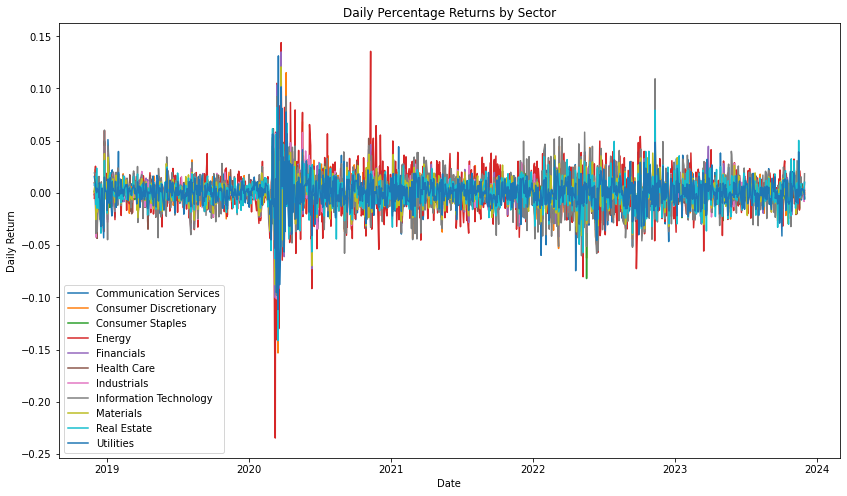

In [42]:
plt.figure(figsize=(14, 8))

for sector in sector_returns.columns:
    plt.plot(sector_returns.index, sector_returns[sector], label=sector)

plt.title('Daily Percentage Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


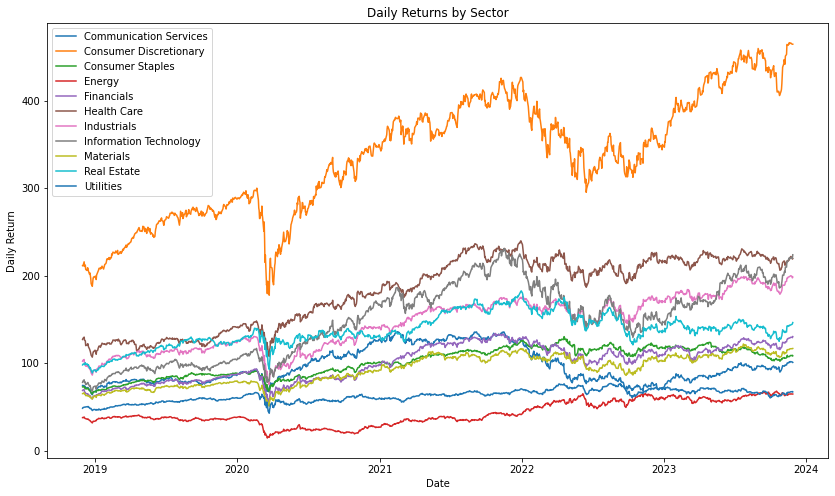

In [43]:
plt.figure(figsize=(14, 8))

for sector in sector_daily.columns:
    plt.plot(sector_daily.index, sector_daily[sector], label=sector)

plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()


In [44]:
from scipy.stats import kstest, norm

ks_results = {}

for sector in sector_returns.columns:
    data = sector_returns[sector].dropna()
    # standardize data to mean=0, std=1 for KS test
    standardized_data = (data - data.mean()) / data.std()
    
    ks_stat, ks_p = kstest(standardized_data, 'norm')
    
    pass_fail = 'Pass' if ks_p >= 0.05 else 'Fail' # significance level = 0.05    
    ks_results[sector] = {'KS statistic': ks_stat, 'p-value': ks_p}

ks_df_q1 = pd.DataFrame(ks_results).T
ks_df_q1

,KS statistic,p-value
Communication Services,0.063233,8.205209e-05
Consumer Discretionary,0.088780,4.530116e-09
Consumer Staples,0.089062,3.989900e-09
Energy,0.071089,5.721862e-06
Financials,0.096191,1.418306e-10
Health Care,0.065380,4.087780e-05
Industrials,0.088413,5.339672e-09
Information Technology,0.062656,9.854862e-05
Materials,0.072692,3.197569e-06
Real Estate,0.067798,1.813657e-05


In [45]:
# checl if normality pass/fail
for sector in sector_returns.columns:
    ks_results[sector] = {'Normality Test': pass_fail}
ks_results
# ALL FAIL

{'Communication Services': {'Normality Test': 'Fail'},
 'Consumer Discretionary': {'Normality Test': 'Fail'},
 'Consumer Staples': {'Normality Test': 'Fail'},
 'Energy': {'Normality Test': 'Fail'},
 'Financials': {'Normality Test': 'Fail'},
 'Health Care': {'Normality Test': 'Fail'},
 'Industrials': {'Normality Test': 'Fail'},
 'Information Technology': {'Normality Test': 'Fail'},
 'Materials': {'Normality Test': 'Fail'},
 'Real Estate': {'Normality Test': 'Fail'},
 'Utilities': {'Normality Test': 'Fail'}}

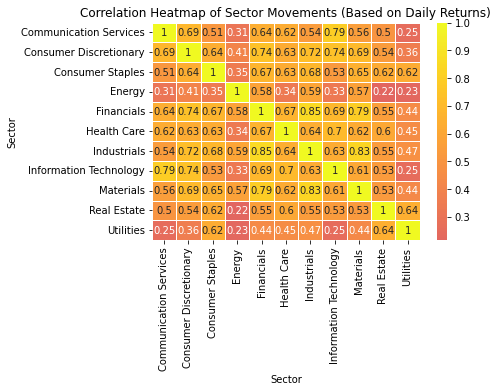

<Figure size 1440x1440 with 0 Axes>

In [46]:
# non-parametric test method : Spearman
correlation_matrix_2 = sector_returns.corr(method='spearman')
sns.heatmap(correlation_matrix_2, annot=True, cmap='plasma', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Sector Movements (Based on Daily Returns)')
plt.figure(figsize=(20, 20))
plt.show()

In [47]:
# spearman's method
sector_pairs = []
sectors = correlation_matrix_2.columns

for i in range(len(sectors)):
    for j in range(i + 1, len(sectors)):
        sector1 = sectors[i]
        sector2 = sectors[j]
        corr = correlation_matrix_2.loc[sector1, sector2]
        if pd.notna(corr):
            sector_pairs.append({
                'Sector 1': sector1,
                'Sector 2': sector2,
                'Correlation': corr
            })

pairwise_df_2 = pd.DataFrame(sector_pairs)

# sort by correlation
top_10_2 = pairwise_df_2.sort_values(by='Correlation', ascending=False).head(10)
bottom_10_2 = pairwise_df_2.sort_values(by='Correlation', ascending=True).head(10)

print("10 Most Correlated Sector Pairs:\n")
print(top_10_2.to_string(index=False))

print("\n10 Least Correlated Sector Pairs:\n")
print(bottom_10_2.to_string(index=False))


10 Most Correlated Sector Pairs:

              Sector 1               Sector 2  Correlation
            Financials            Industrials     0.852745
           Industrials              Materials     0.833247
            Financials              Materials     0.793747
Communication Services Information Technology     0.790696
Consumer Discretionary Information Technology     0.742421
Consumer Discretionary             Financials     0.736142
Consumer Discretionary            Industrials     0.721649
           Health Care Information Technology     0.702762
Consumer Discretionary              Materials     0.694810
Communication Services Consumer Discretionary     0.686430

10 Least Correlated Sector Pairs:

              Sector 1               Sector 2  Correlation
                Energy            Real Estate     0.216449
                Energy              Utilities     0.225547
Communication Services              Utilities     0.251555
Information Technology              Utilities

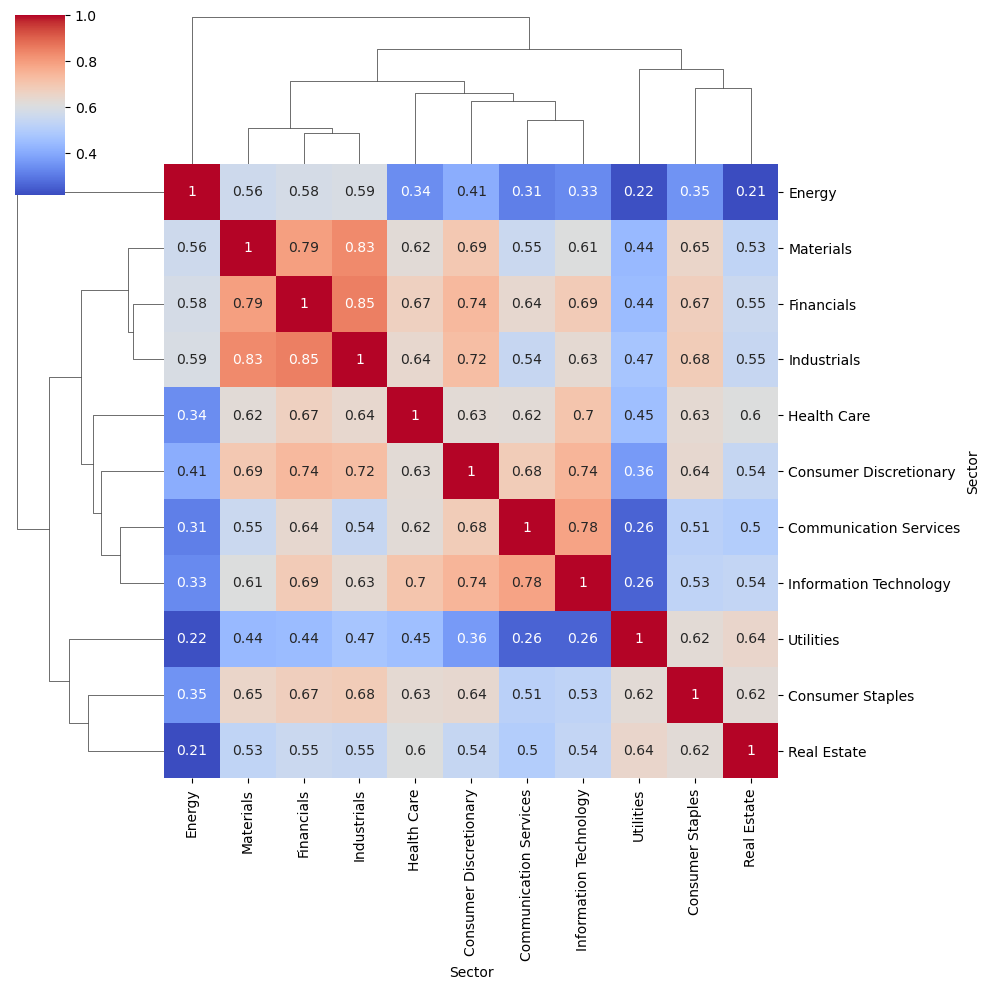

In [28]:
# random nicer version of correlation matrix 2 heatmap
# ordered version of correlation_matrix_2
sns.clustermap(correlation_matrix_2, cmap='coolwarm', annot=True)

In [29]:
sectors = sector_returns.columns.tolist()
sectors

['Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities']

In [30]:
sectors = [s for s in sectors if s != 'Period']
sectors

['Communication Services',
 'Consumer Discretionary',
 'Consumer Staples',
 'Energy',
 'Financials',
 'Health Care',
 'Industrials',
 'Information Technology',
 'Materials',
 'Real Estate',
 'Utilities']

In [31]:
from scipy.stats import spearmanr

results = []

for i in range(len(sectors)):
    for j in range(i + 1, len(sectors)):
        s1 = sector_returns[sectors[i]]
        s2 = sector_returns[sectors[j]]
        
        coef, p = spearmanr(s1, s2)
        
        reject_null = "YES" if p < 0.05 else "NO"
        
        results.append({
            'Sector 1': sectors[i],
            'Sector 2': sectors[j],
            'Spearman Coefficient': coef,
            'P-value': p,
            'Reject Null?': reject_null
        })

results_df = pd.DataFrame(results)

# Sort by strongest correlation
results_df.sort_values(by='Spearman Coefficient', ascending=False)

,Sector 1,Sector 2,Spearman Coefficient,P-value,Reject Null?
35,Financials,Industrials,0.852745,0.000000e+00,YES
46,Industrials,Materials,0.833247,0.000000e+00,YES
37,Financials,Materials,0.793747,2.974648e-273,YES
6,Communication Services,Information Technology,0.782756,8.983674e-261,YES
15,Consumer Discretionary,Information Technology,0.743251,2.521526e-221,YES
12,Consumer Discretionary,Financials,0.736142,5.427919e-215,YES
14,Consumer Discretionary,Industrials,0.721649,1.074613e-202,YES
41,Health Care,Information Technology,0.704662,3.037396e-189,YES
16,Consumer Discretionary,Materials,0.694810,7.100593e-182,YES
36,Financials,Information Technology,0.686057,1.420045e-175,YES


#### EDA
    the highest correlation : financials and Industrials
    the lowest correlation : Energy and Real Estate

#### Inferential Methods
    test : Spearman correlation test
    method :  compare pairwise sector correlation

#### Inferential analysis
    null hypothesis : There is no correlation between sector returns
    alternative hypothesis : There is a significant correlation between sector returns

### Research 2 : 
    2) How did different sectors perform during key COVID-19 periods (pre-pandemic, pandemic onset, and recovery)?

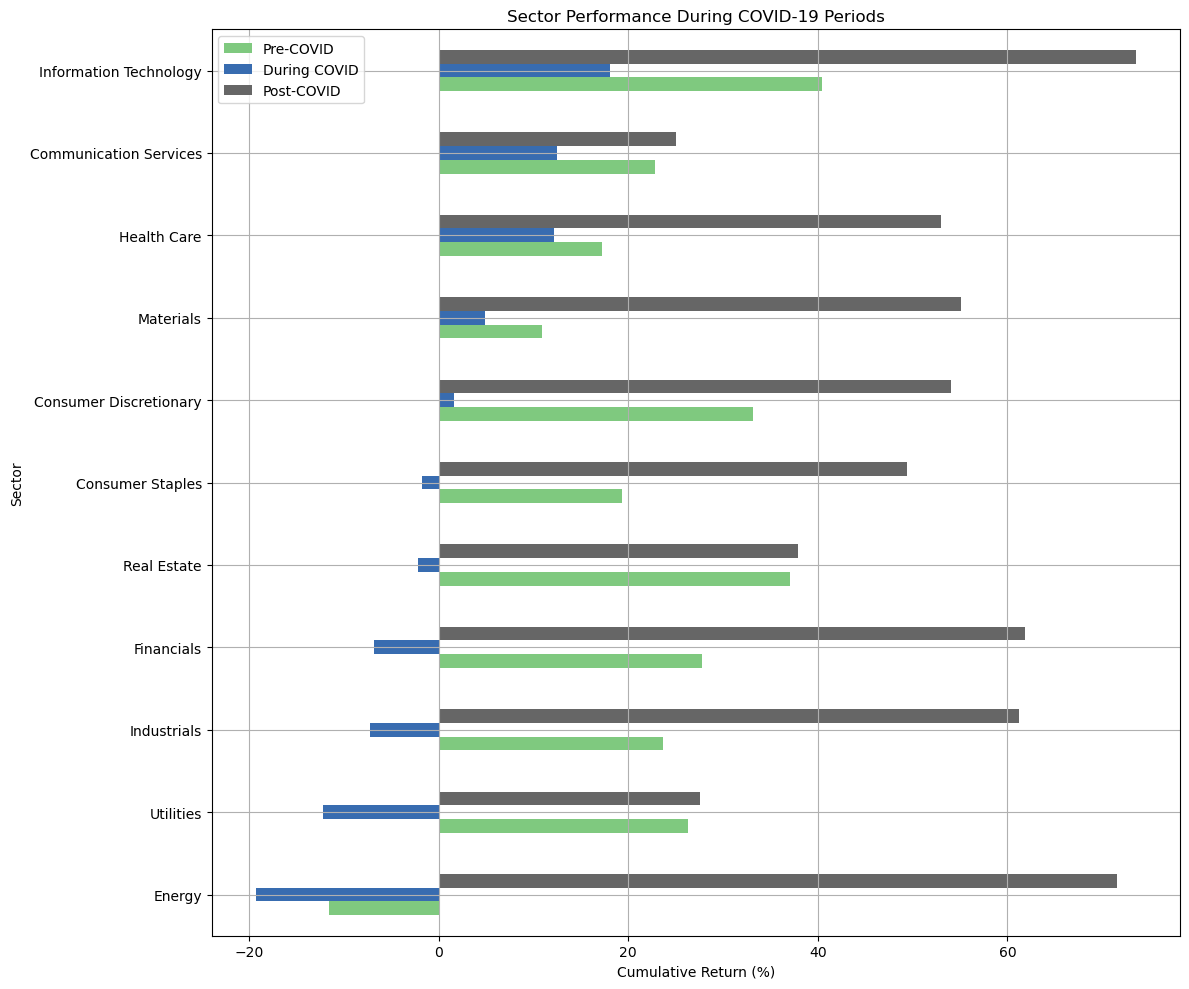

In [32]:
# CUMULATIVE RETURN

# force conversion to datetime and strip timezone
merged_df['Date'] = merged_df['Date'].dt.tz_localize(None)

# calculate daily sector average close prices
# group and unstack (make sure 'Date' becomes index)
sector_daily = merged_df.groupby(['Date', 'Sector'])['Close'].mean().unstack()

# set index as datetime 
sector_daily.index = pd.to_datetime(sector_daily.index)

# define time ranges
pre_covid = sector_daily.loc['2019-01-01':'2020-02-29']
during_covid = sector_daily.loc['2020-03-01':'2020-06-30'] # covid started on March, 2020. 
post_covid = sector_daily.loc['2020-07-01':'2021-12-31']

def get_cumulative_return(df):# pass in dataframe
    return (df / df.iloc[0] - 1).iloc[-1] * 100  # percent return

pre_returns = get_cumulative_return(pre_covid)
during_returns = get_cumulative_return(during_covid)
post_returns = get_cumulative_return(post_covid)

# combine dataframe 
cumulative_returns = pd.DataFrame({
    'Pre-COVID': pre_returns,
    'During COVID': during_returns,
    'Post-COVID': post_returns
}).sort_values('During COVID', ascending=True) # sort the values by the During COVID cumulative returns

cumulative_returns.plot(kind='barh', figsize=(12, 10), colormap='Accent') # showing in horizontal bar chart
plt.title("Sector Performance During COVID-19 Periods")
plt.xlabel("Cumulative Return (%)")
plt.ylabel("Sector")
plt.grid(True)
plt.tight_layout()
plt.show()

In [33]:
sector_returns = sector_daily.pct_change().dropna()
sector_returns

Sector,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
Date,,,,,,,,,,,
2018-11-30 05:00:00,-0.001831,-0.001605,0.001634,-0.005357,0.007293,0.009781,0.009312,0.019046,0.000663,0.008508,0.015715
2018-12-03 05:00:00,0.000435,0.022693,0.003891,0.026270,0.007276,0.011488,0.009374,0.018033,0.014857,0.004666,0.008360
2018-12-04 05:00:00,-0.028312,-0.024264,-0.022297,-0.029210,-0.038869,-0.026140,-0.042360,-0.038909,-0.025394,-0.011160,0.002479
2018-12-06 05:00:00,0.015691,0.007007,0.002003,-0.019256,-0.007952,-0.006943,-0.007075,0.007011,-0.006196,0.023758,0.000188
2018-12-07 05:00:00,-0.024836,-0.023164,-0.016823,-0.001987,-0.017698,-0.043520,-0.024830,-0.037351,-0.018384,-0.014614,0.004477
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-22 05:00:00,0.008929,0.001777,0.008174,-0.002097,0.002767,0.004673,0.001320,0.001930,0.001976,0.002817,0.004102
2023-11-24 05:00:00,0.001533,0.000084,0.003628,0.005861,0.005672,0.005369,0.003012,0.002342,0.000926,0.003154,0.004018
2023-11-27 05:00:00,-0.005106,-0.002595,-0.002711,-0.004315,-0.000569,-0.005857,-0.004186,-0.001011,-0.000107,0.003682,0.000476


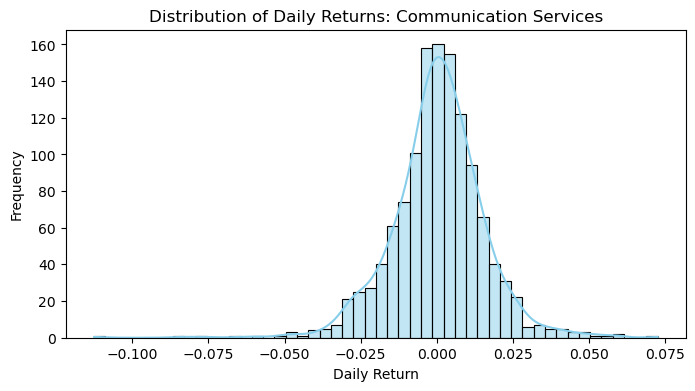

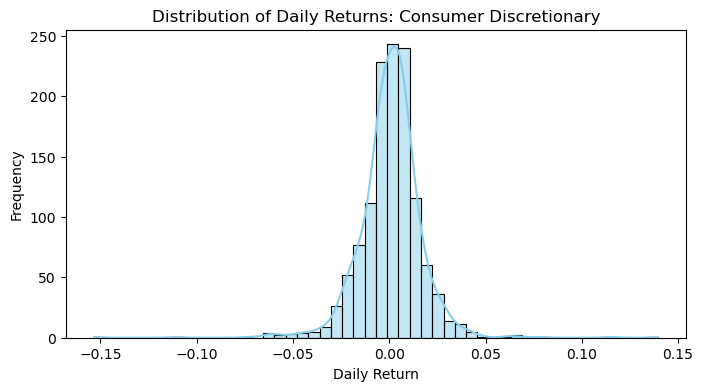

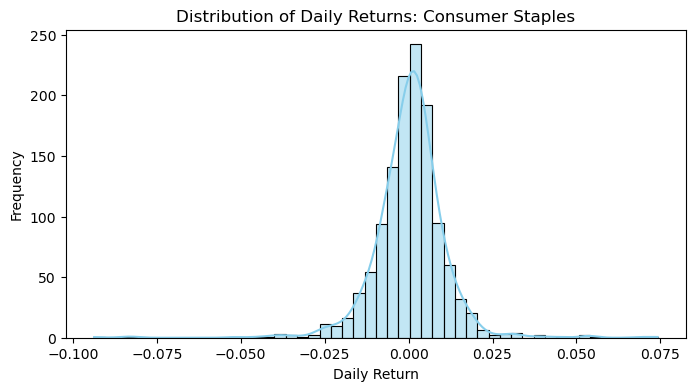

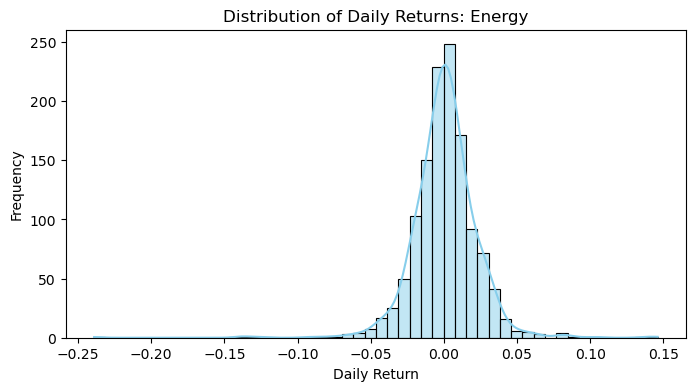

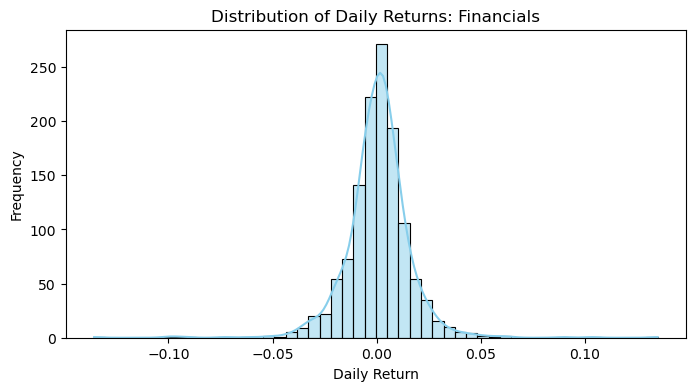

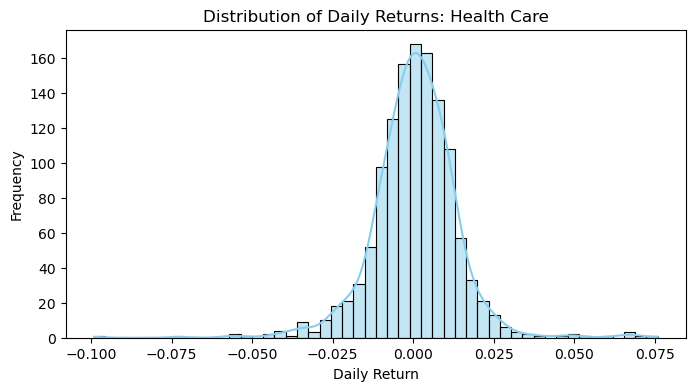

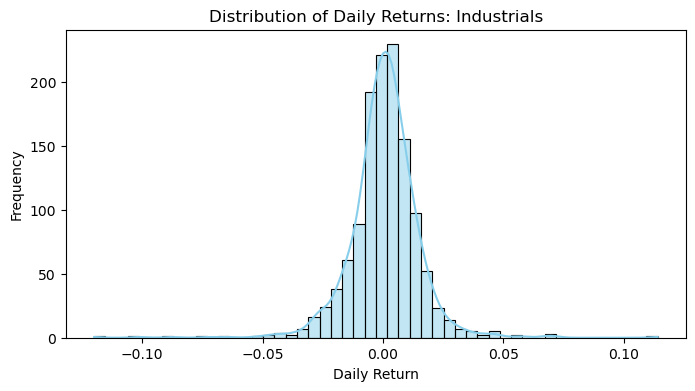

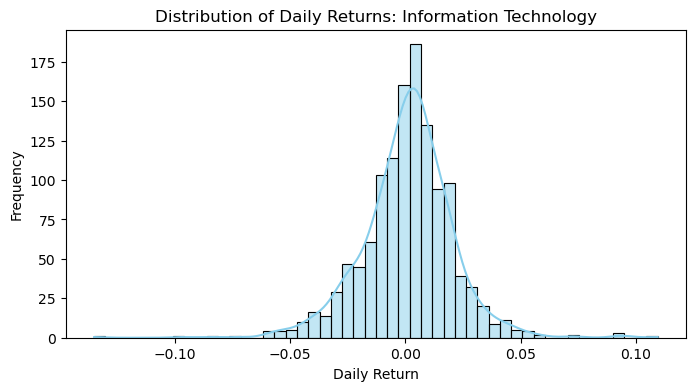

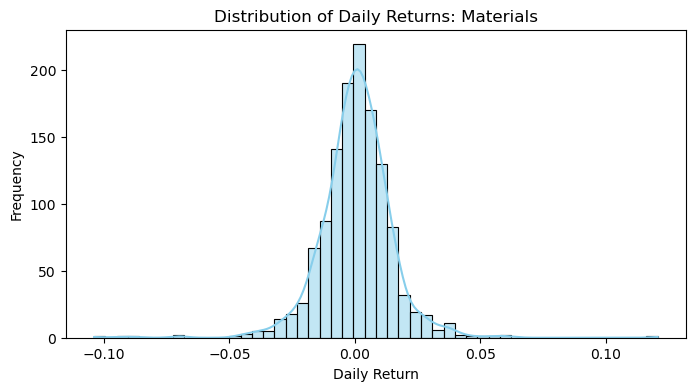

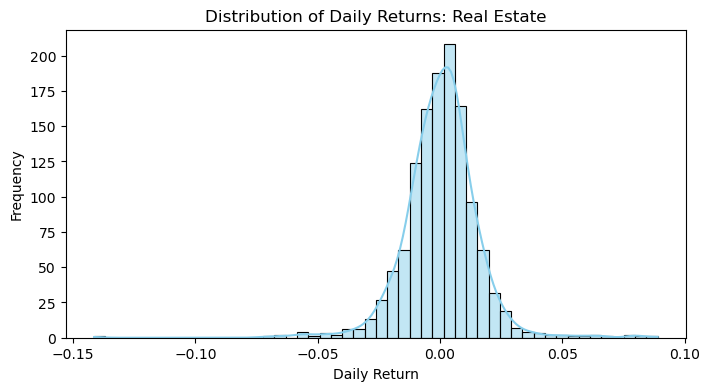

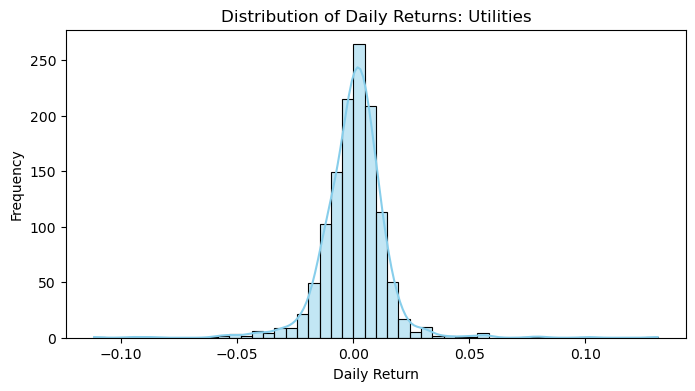

In [34]:
for sector in sector_returns.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(sector_returns[sector], bins=50, kde=True, color='skyblue')
    plt.title(f'Distribution of Daily Returns: {sector}')
    plt.xlabel('Daily Return')
    plt.ylabel('Frequency')
    plt.show()

In [35]:
from scipy.stats import shapiro

for sector in sector_returns.columns:
    data = sector_returns[sector].dropna()
    stat, p_value = shapiro(data) 
    print(f'{sector}: p-value = {p_value:.4f}')
    if p_value < 0.05:
        print("Not normally distributed\n")
    else:
        print("Looks normal\n")
# even if the plot above looks normally distributed but the test indicates that its not normally distributed

Communication Services: p-value = 0.0000
Not normally distributed

Consumer Discretionary: p-value = 0.0000
Not normally distributed

Consumer Staples: p-value = 0.0000
Not normally distributed

Energy: p-value = 0.0000
Not normally distributed

Financials: p-value = 0.0000
Not normally distributed

Health Care: p-value = 0.0000
Not normally distributed

Industrials: p-value = 0.0000
Not normally distributed

Information Technology: p-value = 0.0000
Not normally distributed

Materials: p-value = 0.0000
Not normally distributed

Real Estate: p-value = 0.0000
Not normally distributed

Utilities: p-value = 0.0000
Not normally distributed



In [36]:
# COMPUTE USING DAILY RETURNS
from scipy.stats import kruskal

# periods
pre_covid_returns = sector_returns.loc['2019-01-01':'2020-02-29']
during_covid_returns = sector_returns.loc['2020-03-01':'2020-06-30']
post_covid_returns = sector_returns.loc['2020-07-01':'2021-12-31']


periods = {
    'Pre-COVID': pre_covid_returns,
    'During COVID': during_covid_returns,
    'Post-COVID': post_covid_returns
}

for sector in sector_returns.columns:
    # Collect returns of this sector for each period, dropping NaNs
    data = [periods[period][sector].dropna().values for period in periods]
    
    # Run Kruskal-Wallis test across the three periods for this sector
    h_stat, p_value = kruskal(*data)
    
    print(f"Sector: {sector}")
    print()
    print(f"  Kruskal-Wallis H-statistic: {h_stat:.4f}, p-value: {p_value:.6f}")
    if p_value < 0.05:
        print("  --> Significant difference across periods\n") # reject null
    else:
        print("  --> No significant difference across periods\n") # cant reject null 
    print("===================================")


Sector: Communication Services

  Kruskal-Wallis H-statistic: 3.7219, p-value: 0.155525
  --> No significant difference across periods

Sector: Consumer Discretionary

  Kruskal-Wallis H-statistic: 0.9673, p-value: 0.616539
  --> No significant difference across periods

Sector: Consumer Staples

  Kruskal-Wallis H-statistic: 0.3524, p-value: 0.838444
  --> No significant difference across periods

Sector: Energy

  Kruskal-Wallis H-statistic: 0.8861, p-value: 0.642071
  --> No significant difference across periods

Sector: Financials

  Kruskal-Wallis H-statistic: 0.4461, p-value: 0.800088
  --> No significant difference across periods

Sector: Health Care

  Kruskal-Wallis H-statistic: 0.8152, p-value: 0.665251
  --> No significant difference across periods

Sector: Industrials

  Kruskal-Wallis H-statistic: 0.1321, p-value: 0.936079
  --> No significant difference across periods

Sector: Information Technology

  Kruskal-Wallis H-statistic: 1.9961, p-value: 0.368594
  --> No signifi

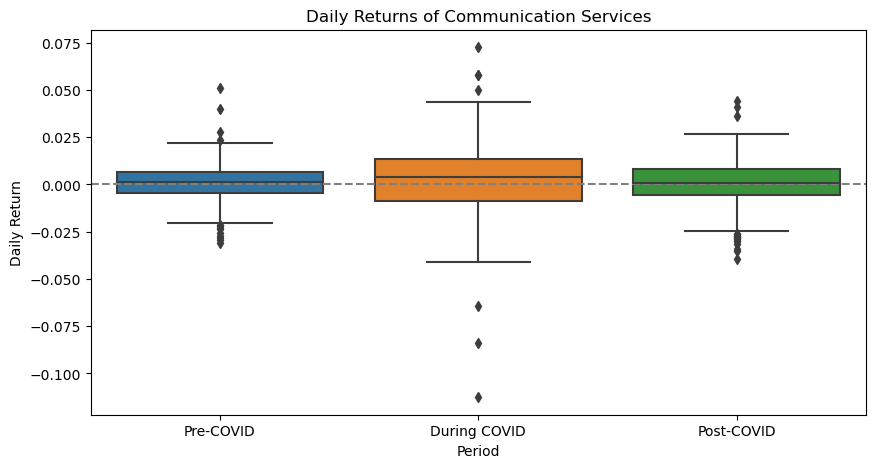

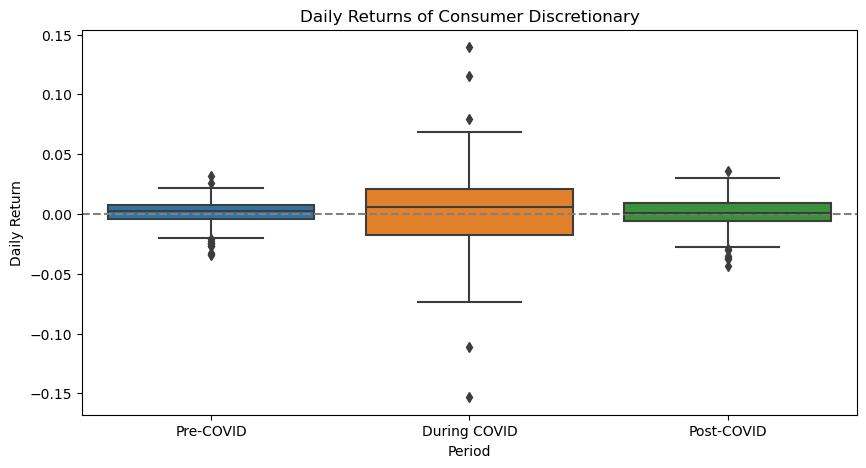

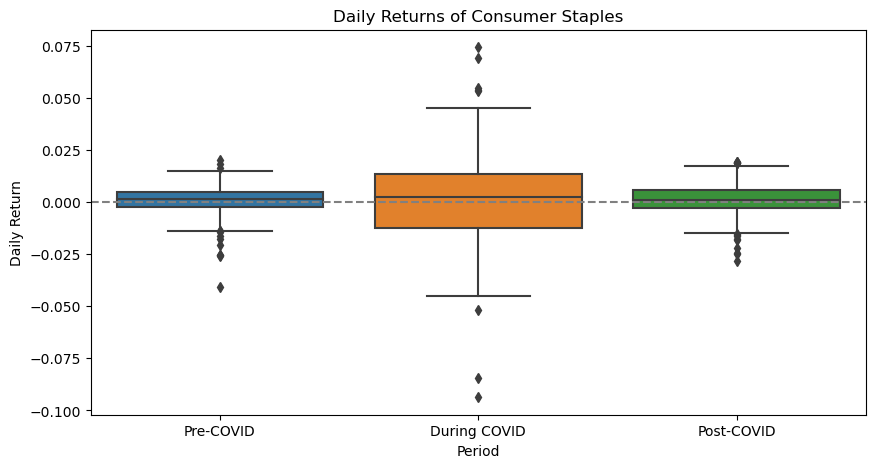

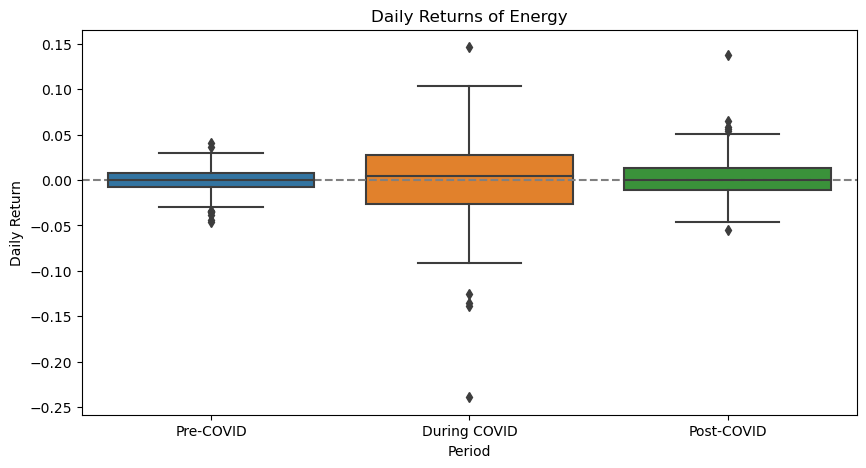

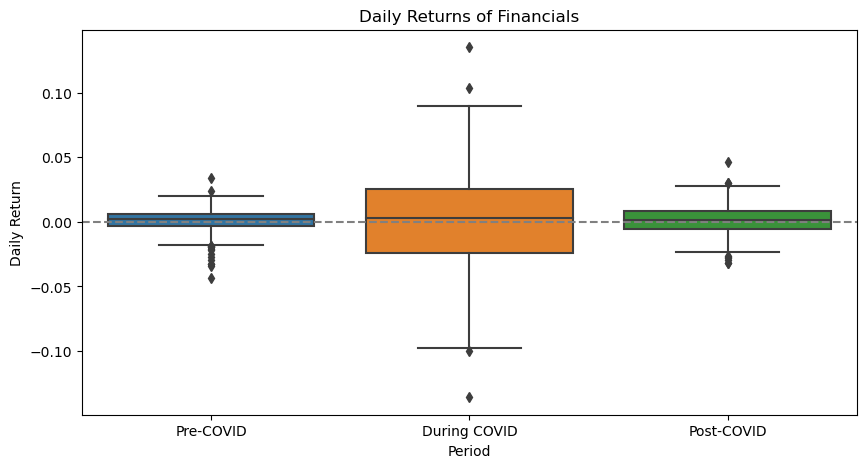

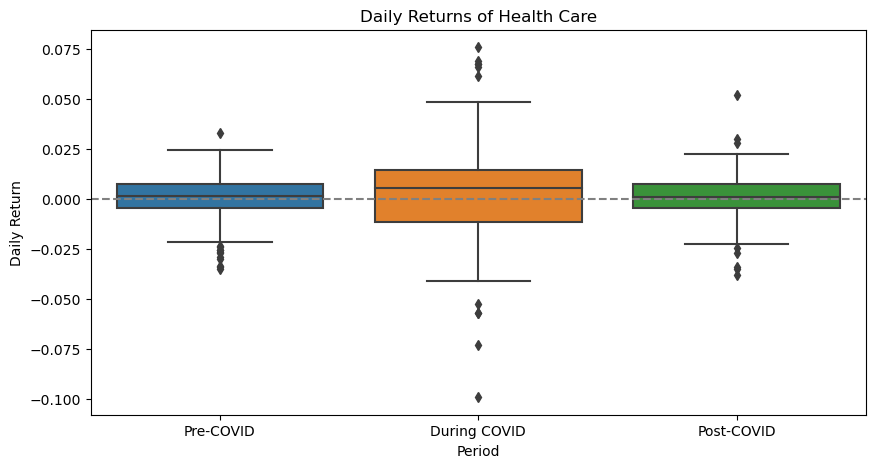

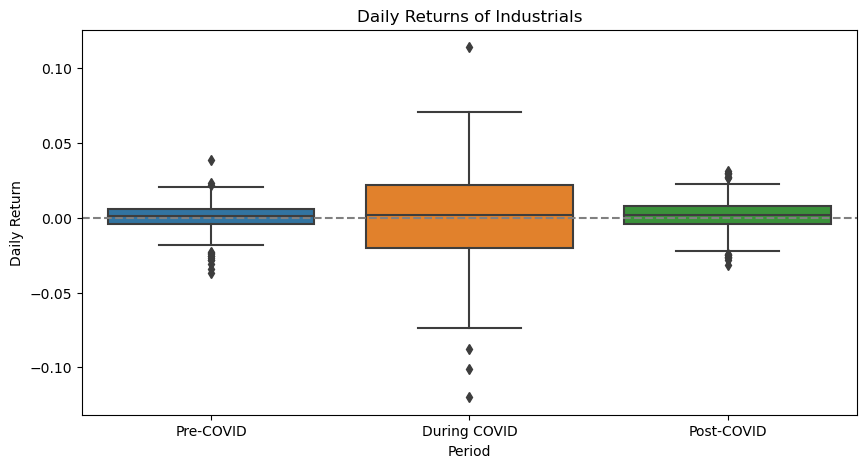

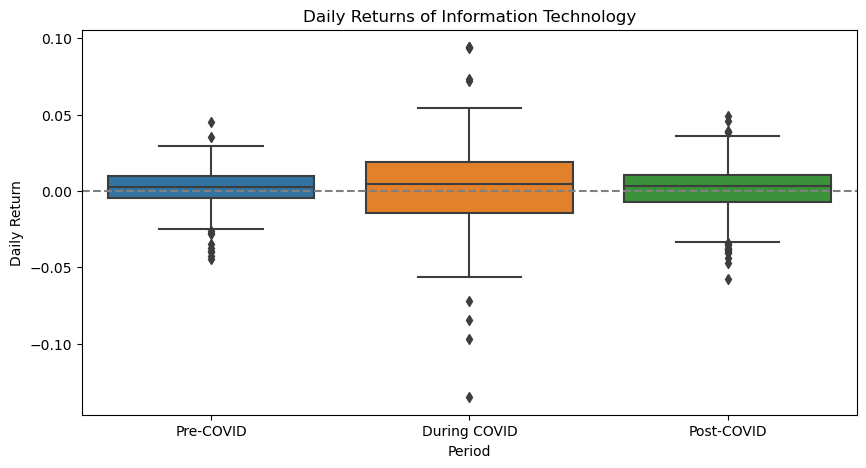

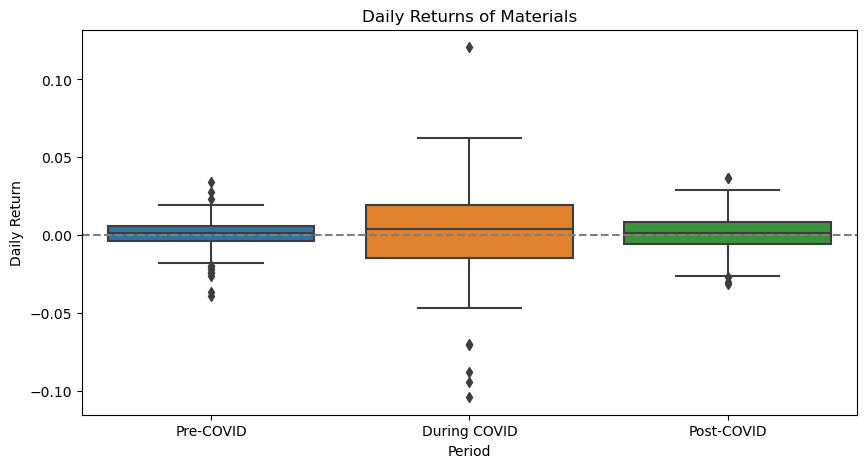

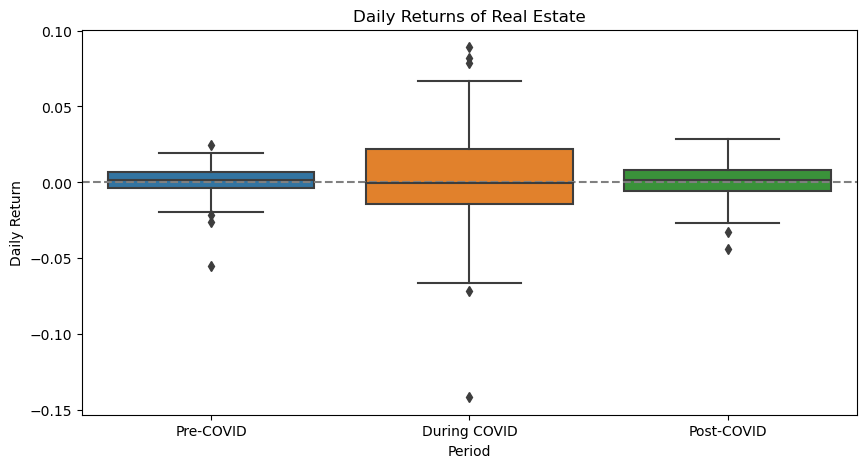

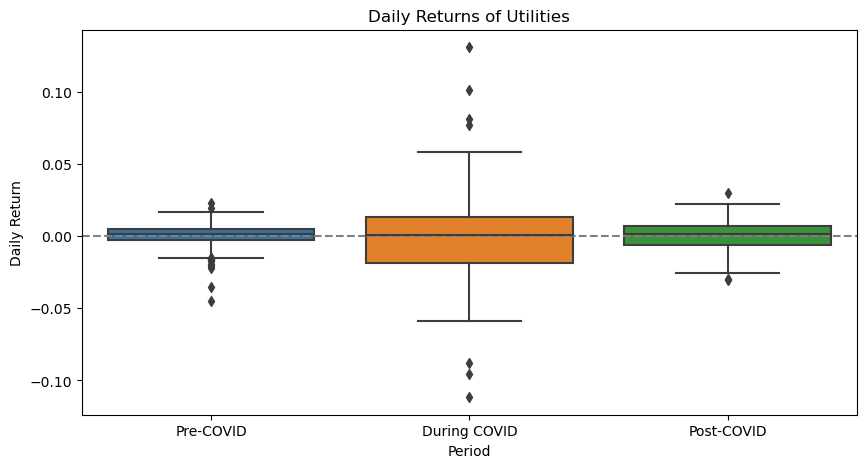

In [37]:
sector_returns = sector_returns.copy()
sector_returns.index = pd.to_datetime(sector_returns.index)

# Melt the data for easier plotting
sector_returns['Period'] = pd.cut(
    sector_returns.index,
    bins=[
        pd.to_datetime('2019-01-01'),
        pd.to_datetime('2020-02-29'),
        pd.to_datetime('2020-06-30'),
        pd.to_datetime('2021-12-31')
    ],
    labels=['Pre-COVID', 'During COVID', 'Post-COVID']
)

# Loop through sectors and plot
for sector in sector_returns.columns.drop('Period'):
    df_plot = sector_returns[[sector, 'Period']].dropna()
    df_plot = df_plot.rename(columns={sector: 'Daily Return'})
    
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Period', y='Daily Return', data=df_plot)
    plt.title(f'Daily Returns of {sector}')
    plt.axhline(0, color='gray', linestyle='--')
    plt.show()

#### EDA
    the outperformed sector: Information Technology
    the underperformed sector: Energy
        from the bar chart, every sector bounced back after COVID-19 situation, but the energy does not give a positive return after the COVID-19 situation. This circumstance might imply something significant about the sector. 

#### Inferential Methods
    test : Kruskal-Wallis test
    method :  compare each sectors across 3 significant COVID-19 periods

#### Inferential analysis 
    null hypothesis : The sector’s daily return distributions are the same across the three periods (Pre-, During, and Post-COVID).
    alternative hypothesis :  The sector’s return distribution differs in at least one period.


### Research 3 : 
    3) Which industry sectors offer the best risk-adjusted returns over 5 years

In [38]:
merged_df = merged_df.sort_values(['Company', 'Date'])  # sort by company & date

# Calculate daily returns per company
merged_df['Return'] = merged_df.groupby('Company')['Close'].pct_change()


                    Sector  Annualized Return  Annualized Volatility  \
0   Information Technology           0.305660               0.300147   
1              Health Care           0.181574               0.197282   
2   Consumer Discretionary           0.216950               0.270998   
3              Industrials           0.184231               0.231117   
4                Materials           0.190384               0.245549   
5         Consumer Staples           0.103422               0.170471   
6               Financials           0.154039               0.264033   
7                   Energy           0.207764               0.357886   
8              Real Estate           0.135464               0.252306   
9   Communication Services           0.116605               0.217520   
10               Utilities           0.120147               0.226863   

    Sharpe Ratio  
0       1.018369  
1       0.920378  
2       0.800558  
3       0.797134  
4       0.775341  
5       0.606682  
6 

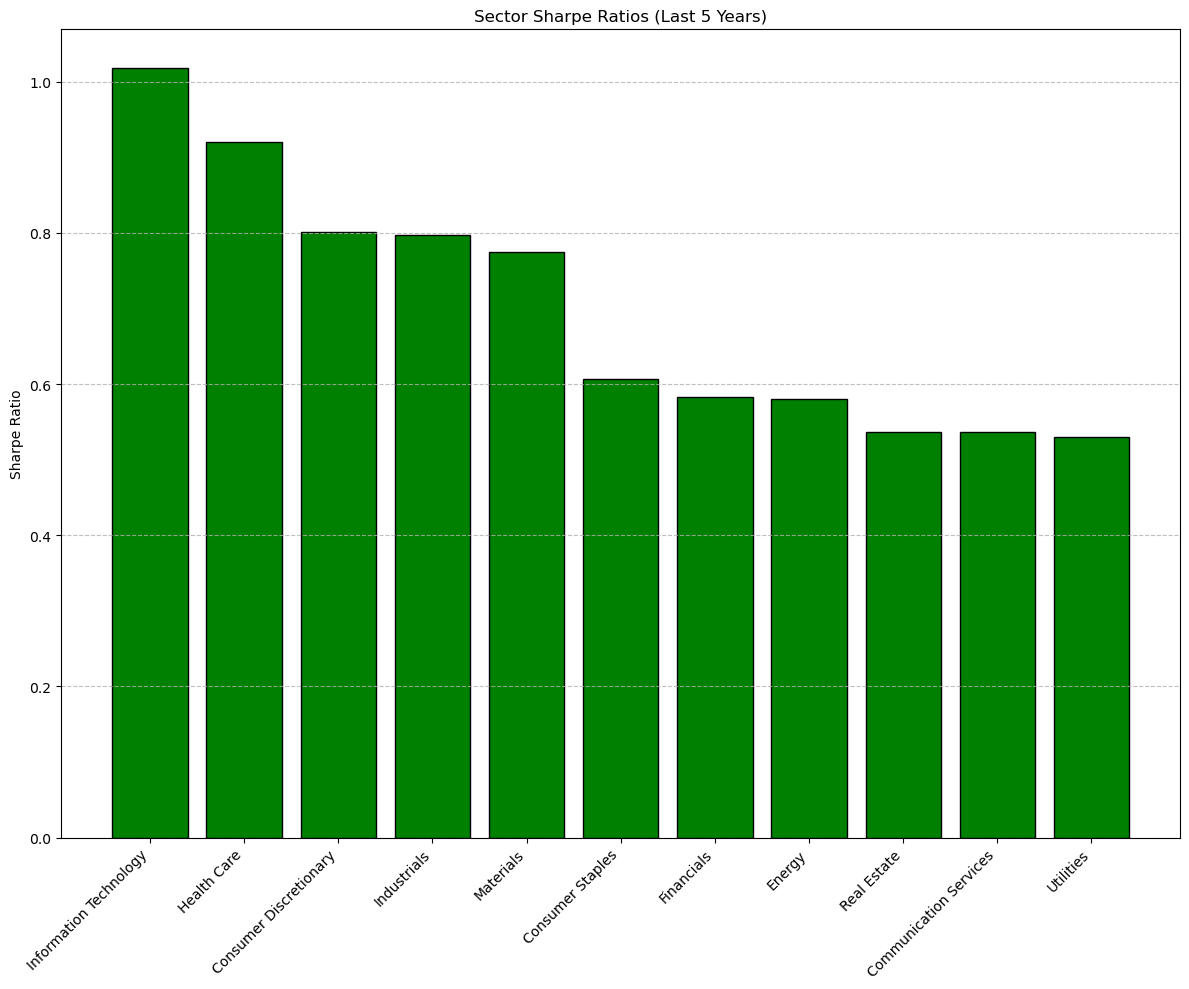

In [39]:
# define 5-year period range based on max date in data
end_date = merged_df['Date'].max()
start_date = end_date - pd.DateOffset(years=5)

# filter data for last 5 years only
df_5yr = merged_df[(merged_df['Date'] >= start_date) & (merged_df['Date'] <= end_date)].copy()

# drop rows with missing returns
df_5yr = df_5yr.dropna(subset=['Return'])

# group by Sector and Date, calculate mean daily return per sector
sector_returns_5yr = df_5yr.groupby(['Sector', 'Date'])['Return'].mean().reset_index()

# around 252 trading days
TRADING_DAYS = 252

# Calculate annualized return, volatility, and Sharpe ratio for each sector
metrics = []

for sector, group in sector_returns_5yr.groupby('Sector'):
    daily_returns = group['Return']
    
    # annualized average return (geometric approx)
    avg_daily_return = daily_returns.mean()
    annualized_return = avg_daily_return * TRADING_DAYS
    
    # annualized volatility
    daily_volatility = daily_returns.std()
    annualized_volatility = daily_volatility * np.sqrt(TRADING_DAYS)
    
    # Sharpe ratio (assume risk-free rate = 0)
    sharpe_ratio = annualized_return / annualized_volatility if annualized_volatility != 0 else np.nan
    
    metrics.append({
        'Sector': sector,
        'Annualized Return': annualized_return,
        'Annualized Volatility': annualized_volatility,
        'Sharpe Ratio': sharpe_ratio
    })

metrics_df = pd.DataFrame(metrics)

# sort
metrics_df = metrics_df.sort_values(by='Sharpe Ratio', ascending=False).reset_index(drop=True)
print(metrics_df)

plt.figure(figsize=(12,10))
plt.bar(metrics_df['Sector'], metrics_df['Sharpe Ratio'], color='green', edgecolor = 'black')
plt.xticks(rotation=45, ha='right')
plt.title('Sector Sharpe Ratios (Last 5 Years)')
plt.ylabel('Sharpe Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.8)
plt.tight_layout()
plt.show()

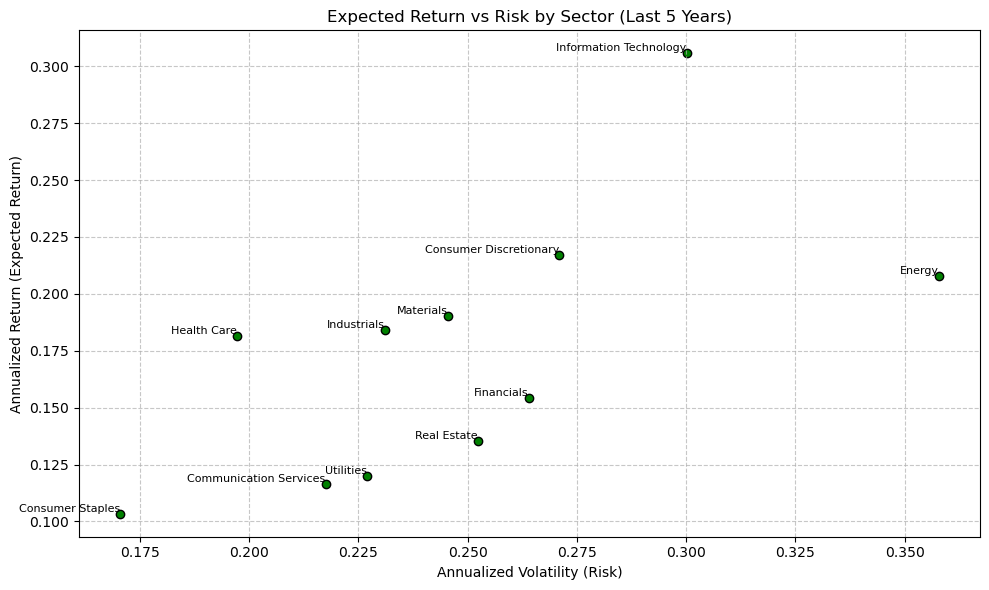

In [40]:
plt.figure(figsize=(10, 6))

# Scatter: Expected Return vs Standard Deviation
plt.scatter(metrics_df['Annualized Volatility'], metrics_df['Annualized Return'],
            color='green', edgecolor='black')

# Label each sector
for _, row in metrics_df.iterrows():
    plt.text(row['Annualized Volatility'], row['Annualized Return'], row['Sector'],
             fontsize=8, ha='right', va='bottom')

plt.title('Expected Return vs Risk by Sector (Last 5 Years)')
plt.xlabel('Annualized Volatility (Risk)')
plt.ylabel('Annualized Return (Expected Return)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [41]:
bootstrap_samples = 1000
TRADING_DAYS = 252

sharpe_by_sector = []

for sector in sectors:
    sector_returns = sector_returns_5yr.loc[
        sector_returns_5yr['Sector'] == sector, 'Return'
    ].values

    boot_sharpes = []
    for _ in range(bootstrap_samples):
        sample = np.random.choice(sector_returns, size=len(sector_returns), replace=True)
        mean = np.mean(sample) * TRADING_DAYS
        std = np.std(sample) * np.sqrt(TRADING_DAYS)
        sharpe = mean / std if std != 0 else np.nan
        boot_sharpes.append(sharpe)

    sharpe_by_sector.append(boot_sharpes)

h_stat, p_value = kruskal(*sharpe_by_sector)

print(f"Test used : Kruskal-Wallis")
print(f"H-statistic: {h_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < 0.05:
    print("Reject H0: At least one industry sector has a Sharpe ratio that is significantly different from the other sectors")
else:
    print("Fail to reject H0: Aall sectors have the same Sharpe ratio")


Test used : Kruskal-Wallis
H-statistic: 1205.4541
P-value: 0.000000
Reject H0: At least one industry sector has a Sharpe ratio that is significantly different from the other sectors


#### EDA
    The industry sectors that offer the best risk-adjusted returns over 5 years is Information Technology
    The industry sectors that offer the worst risk-adjusted returns over 5 years is Utilities


#### Inferential Methods
    - test : Kruskal-Wallis

#### Inferential Analysis
    - null hypothesis : all sectors have the same Sharpe ratio.
    - alternative hypothesis : At least one industry sector has a Sharpe ratio that is significantly different 
    from the other sectors